
Referências:

 [cms-opendata-workshop](https://github.com/cms-opendata-workshop/workshop2024-lesson-event-selection/blob/main/instructors/data_selection_lesson.ipynb)

[Scikit-HEP project](https://scikit-hep.org/)

---
# Hands-On: Análise de Dados

 Parte I

1. Vamos analisar dados reais do tipo NanoAOD do run2 de 2016 (Era G).


2. Escolher um arquivo específico da lista disponibilizada pelo [CMS Open Data](https://opendata.cern.ch/record/30522/files/CMS_Run2016G_DoubleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v2_2430000_file_index.txt).


  * Abrir e ler o arquivo com o *uproot*.
  * Verificar o que contém nesse arquivo.

3. Cortes de pré-seleção.


4. Plotar algumas variáveis cinemáticas de cada múon: $p_{T}$, η (pseudorapidez), ϕ, ...


5. Criar os 4-vetores dos múons e do par.


6. Plotar $p_{T}$ e η do par de múons.

7. Calcular a massa invariante do par de múons.

8. Criar um dataframe e salvar as informações desejadas.



---


In [1]:
%load_ext autoreload
%autoreload 2

# **Parte I**

# Instalar: coffea, uproot, awkward

coffea, uproot, e awkward são três bibliotecas importantes para análise de dados em Física de Altas Energias (HEP), elas facilitam o trabalho com arquivos ROOT, que são utilizados no contexto dos experimentos no CERN.


* [coffea](https://github.com/CoffeaTeam/coffea
)

* [uproot](https://uproot.readthedocs.io/en/latest/basic.html)

*   [awkward](https://awkward-array.org/doc/main/)

* Ferramentas adicionais:
    * **pandas**: biblioteca para estruturas de dados tabulares e ferramentas de análise em Python ([documentação do pandas](https://pandas.pydata.org/docs/getting_started/index.html)).

  * **numpy**: fornece cálculos numéricos, como criação de histogramas.

  * **matplotlib**: ferramenta comum para criar gráficos, figuras, imagens, visualizações.

  * **vector**: é especializada no trabalho com vetores em 2D, 3D e vetores de Lorentz. Esta biblioteca foi projetada para funcionar com versões do Python 3.8 ou superiores ([documentação do vector](https://vector.readthedocs.io/en/latest/)).



In [3]:
try:
  import coffea
except ImportError as e:
  !pip install coffea
  import coffea
print (coffea.__version__)

2025.1.0


In [3]:
#try:
#  import uproot
#except ImportError as e:
#  !pip install uproot
#  import uproot
#print (uproot.__version__)


In [4]:
#try:
#  import awkward as ak
#except ImportError as e:
#  !pip install awkward
#  import awkward as ak
#print (ak.__version__)

In [10]:
#!pip install uproot awkward xrootd
#!pip install fsspec-xrootd
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep

print (uproot.__version__)
print (ak.__version__)

5.3.11
2.6.7


# 1. Baixar os dados reais do CMS OpenData





**DoubleMuon Data:** https://opendata.cern.ch/record/30522

**[lista de arquivos](https://opendata.cern.ch/record/30522/files/CMS_Run2016G_DoubleMuon_NANOAOD_UL2016_MiniAODv2_NanoAODv9-v2_2430000_file_index.txt)**


**arquivo do exemplo:** root://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root. ( 2.60G; *L*=4.7 /fb)

**[lumi mask](https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
)**  

In [6]:
%time
!wget -nc --no-check-certificate -O DoubleMuonUL2016G.root https://eospublic.cern.ch//eos/opendata/cms/Run2016G/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v2/2430000/A492FDC6-77B1-5745-A129-50784E0B3028.root

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs
File ‘DoubleMuonUL2016G.root’ already there; not retrieving.


In [5]:
!wget -nc https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
!wget -nc https://raw.githubusercontent.com/elizamelo/LumiOpenData/main/lumi_mask.py

--2025-05-02 03:08:54--  https://opendata.cern.ch/record/14220/files/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11686 (11K) [text/plain]
Saving to: ‘Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt’

Cert_271036-284044_ 100%[===================>]  11.41K  --.-KB/s    in 0.001s  

2025-05-02 03:08:55 (12.1 MB/s) - ‘Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt’ saved [11686/11686]

--2025-05-02 03:08:55--  https://raw.githubusercontent.com/elizamelo/LumiOpenData/main/lumi_mask.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting r

In [6]:
#!head -10 Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt

In [7]:
#Workshop CMS Open Data 2024 - utilidades
import lumi_mask
from lumi_mask import build_lumi_mask

# 2. Abrir e explorar o arquivo ROOT usando o uproot



* (2.1) Abrir o arquivo.
* (2.2) Verificar o conteúdo do arquivo.
* (2.3) Verificar o conteúdo da TTree principal: número de eventos, o número de branches, os nomes e os tipos de variáveis em cada branch.


In [11]:
#(2.1) Abrir o arquivo
data = uproot.open("../DoubleMuonUL2016G.root")

In [12]:
data

<ReadOnlyDirectory '/' at 0x7f82b1cebcd0>

In [13]:
#(2.2) Verificar o conteúdo do arquivo
data.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [14]:
data.classnames()

{'tag;1': 'TObjString',
 'Events;1': 'TTree',
 'LuminosityBlocks;1': 'TTree',
 'Runs;1': 'TTree',
 'MetaData;1': 'TTree',
 'ParameterSets;1': 'TTree'}

In [16]:
#(2.3) Verificar o conteúdo da TTee principal
tree = data['Events;1']

In [17]:
tree

<TTree 'Events' (1370 branches) at 0x7f82b09fdd10>

In [18]:
#(2.3a) Verificar o conteúdo da TTee principal

nevents = tree.num_entries

print(f"{nevents = }")


nevents = 2986904


Nos Arrays, os eixos (axis) ajudam a identificar as diferentes dimensões de um array. No Awkward, assim como no NumPy, usamos índices para nos referirmos a essas dimensões.


*   **axis=0**: é o eixo mais externo. Em um _array_ 2D, isso corresponde a quantos _subarrays_ existem. Por exemplo, se você tem um _array_ com eventos, cada evento seria um _subarray_ e axis=0 nos diria quantos eventos (_subarrays_) existem.
*   **axis=-1**: é o eixo mais interno. Para um _array_ 2D, isso se refere aos elementos dentro de cada _subarray_. Logo, se os _subarrays_ contêm informações sobre múons, axis=-1 nos diria quantos múons existem em cada _subarray_.

Em um array 2D, o eixo 1 é o mesmo que o eixo -1, pois ambos se referem à mesma dimensão interna.

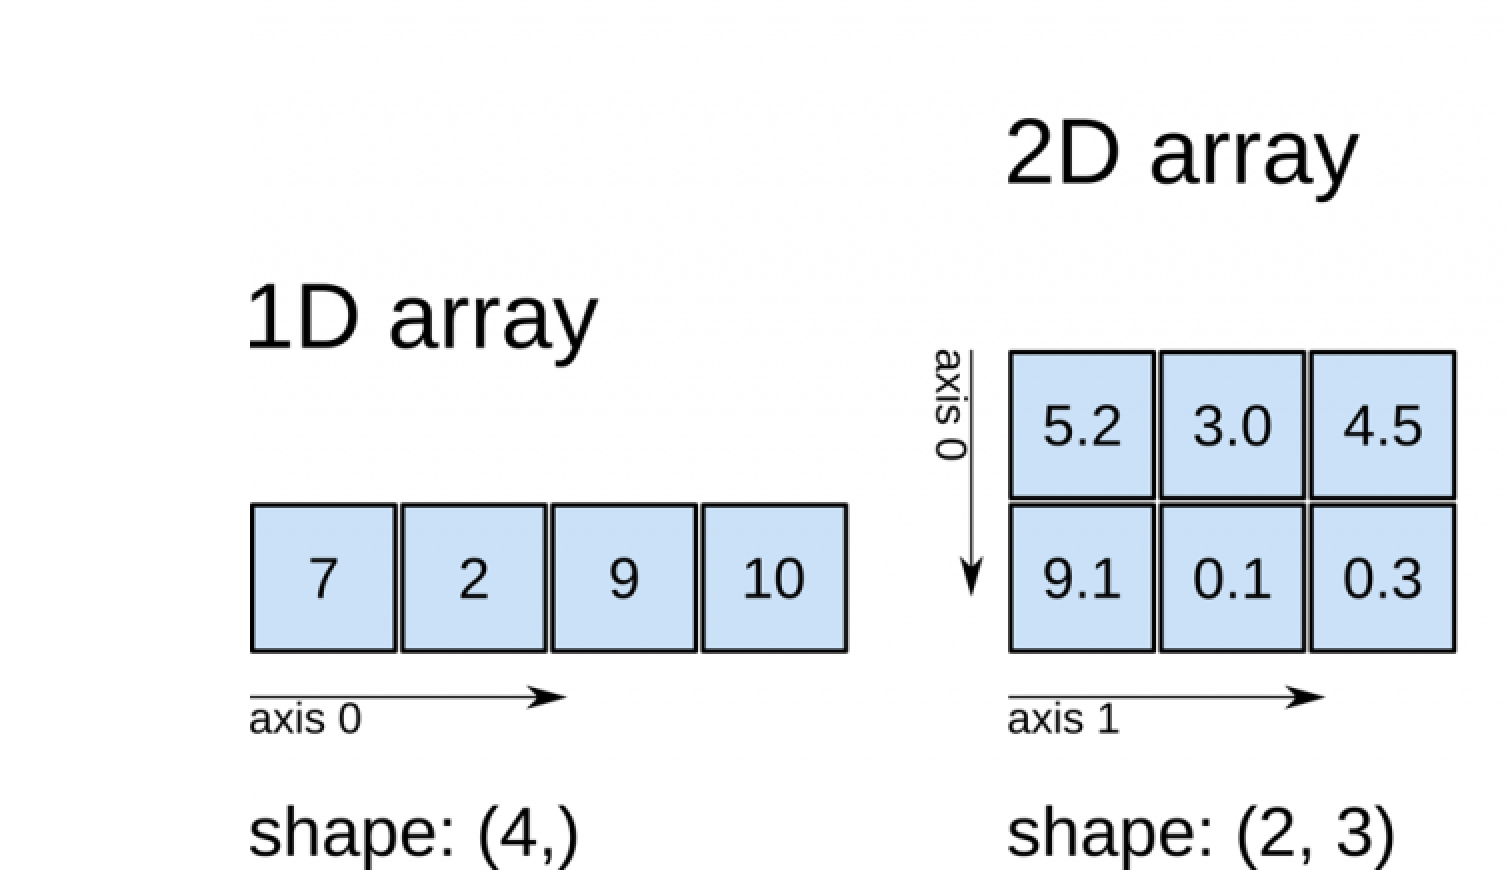

In [17]:
#número de eventos no dataset
#ak.num(tree['Muon_pt'].array(), axis=0)

In [18]:
#número de múons por evento
#ak.num(tree['Muon_pt'].array(), axis=-1)

In [19]:
#(2.3b)Verificar o conteúdo da tree : o número de branches, os nomes e os tipos de variáveis em cada branch.
keys = tree.keys()
keys

['run',
 'luminosityBlock',
 'event',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_jetIdx',
 'boostedTau_rawAntiEleCat2018',
 'boostedTau_idAntiEle2018',
 'boostedTau_idAntiMu',
 'boostedTau_idMVAnewDM2017v2',
 'boostedTau_idMVAoldDM2017v2',
 'boostedTau_idMVAoldDMdR032017v2',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_ra

In [21]:
#(2.3c)Verificar o conteúdo da tree : o número de branches, os nomes e os tipos de variáveis em cada branch.

tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
nboostedTau          | uint32_t                 | AsDtype('>u4')
boostedTau_charge... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_eta       | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_mass      | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_neutra... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_phi       | float[]                  | AsJ

In [22]:
# Mostrar somente os branches que têm "Muon" no nome
muon_branches = [key for key in keys if 'Mu' in key]
print(muon_branches)

['boostedTau_idAntiMu', 'Jet_nMuons', 'L1PreFiringWeight_Muon_Nom', 'L1PreFiringWeight_Muon_StatDn', 'L1PreFiringWeight_Muon_StatUp', 'L1PreFiringWeight_Muon_SystDn', 'L1PreFiringWeight_Muon_SystUp', 'nMuon', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dxybs', 'Muon_dz', 'Muon_dzErr', 'Muon_eta', 'Muon_ip3d', 'Muon_jetPtRelv2', 'Muon_jetRelIso', 'Muon_mass', 'Muon_miniPFRelIso_all', 'Muon_miniPFRelIso_chg', 'Muon_pfRelIso03_all', 'Muon_pfRelIso03_chg', 'Muon_pfRelIso04_all', 'Muon_phi', 'Muon_pt', 'Muon_ptErr', 'Muon_segmentComp', 'Muon_sip3d', 'Muon_softMva', 'Muon_tkRelIso', 'Muon_tunepRelPt', 'Muon_mvaLowPt', 'Muon_mvaTTH', 'Muon_charge', 'Muon_jetIdx', 'Muon_nStations', 'Muon_nTrackerLayers', 'Muon_pdgId', 'Muon_tightCharge', 'Muon_fsrPhotonIdx', 'Muon_highPtId', 'Muon_highPurity', 'Muon_inTimeMuon', 'Muon_isGlobal', 'Muon_isPFcand', 'Muon_isStandalone', 'Muon_isTracker', 'Muon_jetNDauCharged', 'Muon_looseId', 'Muon_mediumId', 'Muon_mediumPromptId', 'Muon_miniIsoId', 'Muon_multiIsoId', 'Muon_

# Extrair os dados em arrays do Awkward
# 3. Criar algumas condições de pré seleção

*   (3.1) selecionar os runs certificados "good runs";
*   (3.2) selecionar o trigger de múons;
*   (3.3) selecionar o algortimo de ID dos múons (tightID, softID, mediumID ou looseID);
*   (3.4) selecionar apenas 2 múons;
*   (3.5) selecionar apenas 2 múons de cargas opostas;
*   (3.6) combinar as condições(máscaras);

obs.: Verificar se está considerando apenas os eventos que passaram nos seus critérios de seleção.

**mask_lumi** é um _array_ de valores booleanos (`True` e `False`) que indica se um evento específico deve ser considerado (com base em critérios como a luminosidade integrada, por exemplo), e que você quer adicionar isso à sua máscara de cortes combinados, que será usada para filtrar eventos em seus dados de colisão.

In [23]:
#3.1
mask_lumi = build_lumi_mask('Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt', tree, verbose=False)

#print(mask_lumi)
#print(len(mask_lumi))

Uma máscara é um _array_ booleano que é gerado aplicando uma condição a um _array_ de dados. Por exemplo, se quisermos apenas múons com $p_{T}$ > 20 GeV, nossa máscara seria:

In [23]:
print(tree['Muon_pt'].array() > 20)
#o resultado é um boleano

[[False], [False, False], [True, ...], ..., [False, False], [True, True, False]]


Então, podemos aplicar a máscara aos nossos dados. A sintaxe segue outras operações de seleção de _array_ padrão: data[mask].

Isso selecionará apenas os elementos dos nossos dados que correspondem a um `True`.

In [24]:
ak.num(tree['Muon_pt'].array()) == 2

<Array [False, True, True, True, ..., False, True, False] type='2986904 * bool'>



---



---



Antes das seleções, defina as variáveis.

*   Variáveis cinemáticas do objeto múon;
*   Trigger;
*   Muon id;
*   Número de múons;
*   Múons de cargas opostas;
*   ...

In [25]:
#variáveis cinemáticas dos múons
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_phi = tree['Muon_phi'].array()
muon_mass = tree['Muon_mass'].array()  # (~ 0.106 GeV/c^2)

In [26]:
hlt_isomu24 = tree['HLT_IsoMu24'].array()
#hlt_isomu27 = tree['HLT_IsoMu27'].array()
nmuon = tree['nMuon'].array()  # Número de múons por evento
muon_charge = tree['Muon_charge'].array()
muon_tightid = tree['Muon_tightId'].array()


In [27]:
print(tree['Muon_pt'].array())
print(nmuon)
print(muon_pt)

[[5.61], [11.8, 7.36], [33.6, 12.6], ..., [19.1, 17.8], [33.8, 28.4, 3.21]]
[1, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 4, 2, ..., 1, 1, 2, 2, 2, 2, 3, 2, 1, 4, 2, 3]
[[5.61], [11.8, 7.36], [33.6, 12.6], ..., [19.1, 17.8], [33.8, 28.4, 3.21]]


In [28]:
num_mu = ak.num(muon_charge[:5])  # Retorna o número de muons por evento
print(num_mu)
# Verifica a profundidade da estrutura (se é um array de arrays)
print(type(muon_charge))  # Checa o tipo do objeto
print(ak.to_list(muon_charge[:5]))
print(ak.type(muon_charge)) #estrutura detalhada


[1, 2, 2, 2, 2]
<class 'awkward.highlevel.Array'>
[[-1], [1, 1], [1, -1], [-1, 1], [1, 1]]
2986904 * var * int32


In [29]:
# Verifique o número de eventos antes de qualquer corte
num_events_initial = len(nmuon)
print(f"Número inicial de eventos: {num_events_initial}")

# 3.2
# Seleção do trigger
cut_trigger = (hlt_isomu24 == True)
#cut_trigger = (hlt_isomu27 == True)
num_events_after_trigger = ak.sum(cut_trigger)
print(f"Número de eventos após o corte de trigger: {num_events_after_trigger}")

# 3.3
# Seleção do ID de múons
cut_id = (muon_tightid == True)
cut_id_all = ak.all(cut_id, axis=1)  # Todos os múons do evento precisam passar no corte
num_events_after_id_all = ak.sum(cut_id_all)
print(f"Número de eventos após o corte do muon ID: {num_events_after_id_all}")

# Aplicar os cortes: trigger + ID em nível de evento
cut_id_trigger = cut_trigger & cut_id_all
num_events_after_id_trigger = ak.sum(cut_id_trigger)
print(f"Número de eventos após os cortes de trigger e ID: {num_events_after_id_trigger}")

# 3.4
# Seleção do número de múons (número de múons = 2)
cut_nmuons = (nmuon == 2)
num_events_after_nmuons = ak.sum(cut_nmuons)
print(f"Número de eventos após o corte de número de múons (= 2): {num_events_after_nmuons}")

# Aplicar o corte do trigger, ID e do número de múons
cut_nmuons_id_trigger = cut_id_trigger & cut_nmuons
num_events_after_nmuons_id_trigger = ak.sum(cut_nmuons_id_trigger)
print(f"Número de eventos após o corte de número de múons (= 2), trigger e ID: {num_events_after_nmuons_id_trigger}")

# 3.5
# Seleção de múons de cargas opostas
# Usando ak.combinations para verificar múons de cargas opostas
muon_pairs = ak.combinations(muon_charge, 2, axis=1)  # Cria pares de múons
cut_osmuons = (muon_pairs['0'] != muon_pairs['1'])  # Verifica se as cargas são opostas
cut_osmuons_any = ak.any(cut_osmuons, axis=1)  # Pelo menos um par de cargas opostas por evento

num_events_after_osmuons = ak.sum(cut_nmuons_id_trigger & cut_osmuons_any)
print(f"Número de eventos após o corte de cargas opostas: {num_events_after_osmuons}")

# 3.6
# Combinação de todas as máscaras, incluindo os "good runs"
cut_combined = cut_id_trigger & cut_nmuons & cut_osmuons_any & mask_lumi
num_events_after_combined = ak.sum(cut_combined)
print(f"Número de eventos após todos os cortes (combinação completa): {num_events_after_combined}")

Número inicial de eventos: 2986904
Número de eventos após o corte de trigger: 576952
Número de eventos após o corte do muon ID: 1659303
Número de eventos após os cortes de trigger e ID: 444900
Número de eventos após o corte de número de múons (= 2): 1645199
Número de eventos após o corte de número de múons (= 2), trigger e ID: 415107
Número de eventos após o corte de cargas opostas: 406846
Número de eventos após todos os cortes (combinação completa): 405407


* Aplicar essas condições nos objetos





In [30]:
# Agora, vamos aplicar todos os cortes nos objetos (múons), você pode verificar os arrays selecionados
muon_pt_sel = muon_pt[cut_combined]
muon_eta_sel = muon_eta[cut_combined]
muon_phi_sel = muon_phi[cut_combined]
muon_mass_sel = muon_mass[cut_combined]
nmu_sel = nmuon[cut_combined]

In [31]:
print('Input:', muon_pt)
print('Output:', muon_pt[cut_combined])
print('Output:', muon_pt_sel)

Input: [[5.61], [11.8, 7.36], [33.6, 12.6], ..., [19.1, 17.8], [33.8, 28.4, 3.21]]
Output: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2], ..., [35.5, 34.7], [63.6, 35.2]]
Output: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2], ..., [35.5, 34.7], [63.6, 35.2]]


Se você estiver utilizando awkward _arrays_, pode contar o número de elementos após aplicar a máscara:

In [32]:
# Contagem
#num_events_after_cut = ak.count(muon_pt_sel, axis=0)
num_events_after_precut = len(muon_pt_sel)
num_mu_after_precut = ak.count(muon_pt_sel, axis=-1)
print(f"Número de eventos após os cortes e filtragem: {num_events_after_precut}")
print(f"Número de eventos selecionados: {ak.sum(cut_combined)}")
print(f"Número de múons por eventos após os cortes: {num_mu_after_precut}")

Número de eventos após os cortes e filtragem: 405407
Número de eventos selecionados: 405407
Número de múons por eventos após os cortes: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Assim, você pode verificar se está considerando apenas os eventos que passaram nos seus critérios de seleção:

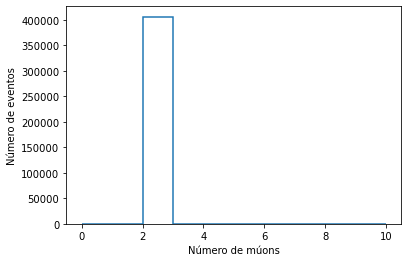

In [34]:
import hist
h = hist.Hist(hist.axis.Regular(10, 0, 10, label='Número de múons'))
h.fill(nmu_sel)
h.plot()
plt.ylabel('Número de eventos')
plt.show()

# 4. Plotar algumas variáveis cinemáticas de cada múon: $p_T$, $\eta$ (pseudorapidez), $\phi$, ...



(4.1) Plots antes de aplicar cortes no momento dos múons.

In [35]:
 #Usamos ak.zip (combinar) para obter pares de índices de múons em cada evento

muons = ak.zip({
     "pt": muon_pt[cut_combined],
     "eta": muon_eta[cut_combined],
     "phi": muon_phi[cut_combined],
     "mass": muon_mass[cut_combined]},

    )

In [36]:
muons.fields

['pt', 'eta', 'phi', 'mass']

In [37]:
# Printando as componentes dos muons
print("pt:", muons.pt)
print("eta:", muons.eta)
print("phi:", muons.phi)
print("mass:", muons.mass)

pt: [[52.6, 42.8], [50.2, 38.6], [53.7, 24.2], ..., [35.5, 34.7], [63.6, 35.2]]
eta: [[-1.43, -1.9], [-0.656, -1.01], [...], ..., [1.57, -0.0325], [-2.31, -1.91]]
phi: [[-2.72, 1.17], [1.63, -1.71], [-1.95, ...], ..., [0.23, 3], [1.69, -2.11]]
mass: [[0.106, 0.106], [0.106, 0.106], [...], ..., [0.106, 0.106], [0.106, 0.106]]


In [38]:
#print(muons[0, 0]) #PtEtaPhiELorentzVector do primeiro múon
#print(muons[0, 1])
#print(muons.pt[:, 0])
#print(muons.pt[:, 1])

In [39]:
print(len(muons.pt))

405407


In [40]:
# Acessando o múon mais energético (primeiro múon) e o segundo múon diretamente
muon1_pt = muons.pt[:, 0]  # Primeiro múon
muon2_pt = muons.pt[:, 1]  # Segundo múon

muon1_eta = muons.eta[:, 0]
muon2_eta = muons.eta[:, 1]

muon1_phi = muons.phi[:, 0]
muon2_phi = muons.phi[:, 1]

muon1_mass = muons.mass[:, 0]
muon2_mass = muons.mass[:, 1]

A notação [:, 0] funciona como uma fatia 2D do _array_, onde:

* : (antes da vírgula) significa "incluir todas as linhas", ou seja, "incluir todos os eventos". Isso seleciona ao longo da primeira dimensão do _array_, que corresponde aos diferentes eventos no seu conjunto de dados.

* O número após a vírgula ( 0 ou 1) seleciona um elemento específico na segunda dimensão, que corresponde aos múons dentro de cada evento. O 0 seleciona o primeiro múon em cada evento, e o 1 seleciona o segundo múon.

In [40]:
# Printar os múons mais energéticos
print("Muon 1 (mais energético):")
print("  pt:", muon1_pt)
print("  eta:", muon1_eta)
print("  phi:", muon1_phi)
print("  mass:", muon1_mass)

print("Muon 2:")
print("  pt:", muon2_pt)
print("  eta:", muon2_eta)
print("  phi:", muon2_phi)
print("  mass:", muon2_mass)

Muon 1 (mais energético):
  pt: [52.6, 50.2, 53.7, 48.5, 43.3, 32, ..., 32.1, 49.1, 85.7, 43.7, 35.5, 63.6]
  eta: [-1.43, -0.656, 0.16, -1.8, -0.0617, ..., -1.78, -0.557, 0.843, 1.57, -2.31]
  phi: [-2.72, 1.63, -1.95, 1.4, 1.38, -1.63, ..., -0.0387, -2.2, 2.76, 0.23, 1.69]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, ..., 0.106, 0.106, 0.106, 0.106, 0.106]
Muon 2:
  pt: [42.8, 38.6, 24.2, 35.4, 39.6, 8.37, ..., 30.3, 39.4, 42.4, 35.3, 34.7, 35.2]
  eta: [-1.9, -1.01, -1.3, -0.883, 0.787, ..., -1.73, -0.525, 1.65, -0.0325, -1.91]
  phi: [1.17, -1.71, 1.25, -1.84, -1.75, -3, ..., 0.99, 2.64, 1.12, -0.837, 3, -2.11]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, ..., 0.106, 0.106, 0.106, 0.106, 0.106]


## Criar os plots de algumas variáveis cinemáticas para cada múon


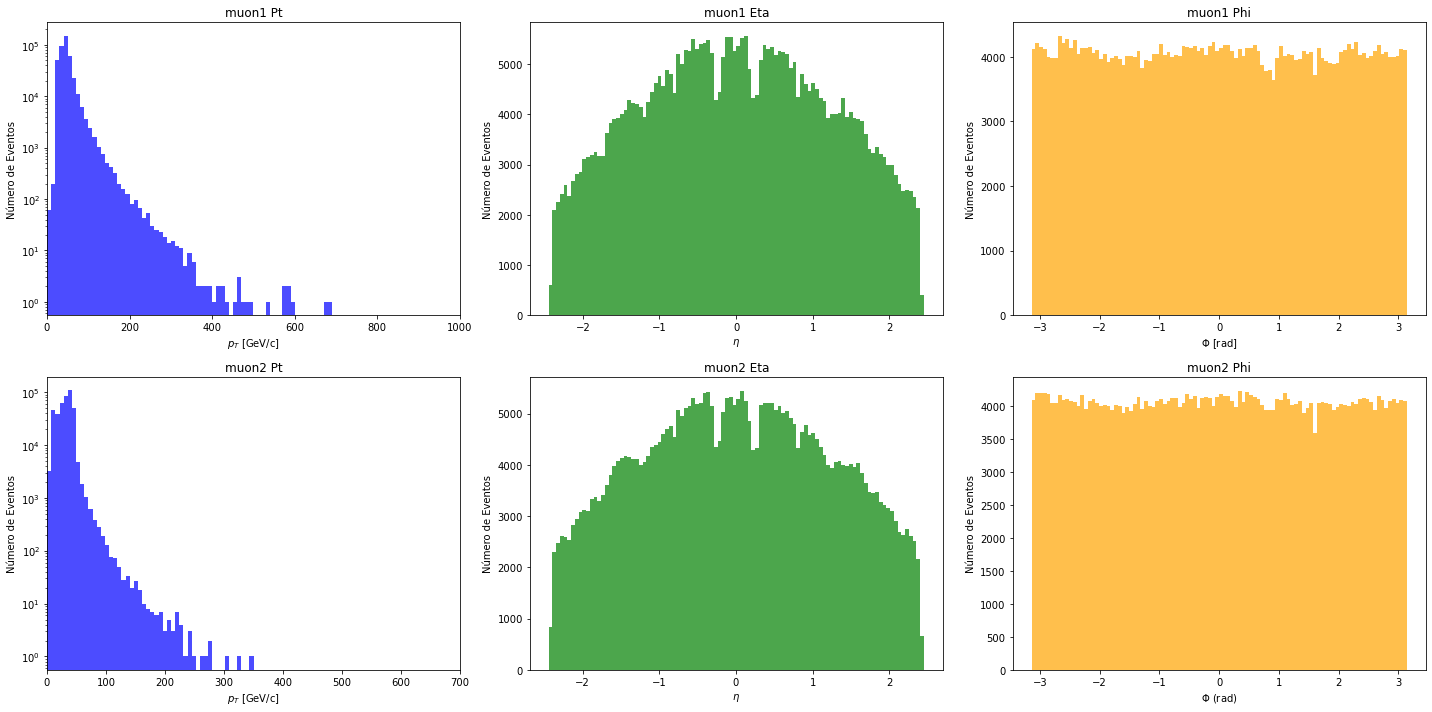

In [42]:
# Criar os plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Configuração do subplot para o muon1
axes[0, 0].hist(muon1_pt, bins=100, range=(0, 1000), color='blue', alpha=0.7)
axes[0, 0].set_title('muon1 Pt')
axes[0, 0].set_xlabel(r'$p_T$ [GeV/c]')
axes[0, 0].set_ylabel('Número de Eventos')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(0, 1000.0)

axes[0, 1].hist(muon1_eta, bins=100, color='green', alpha=0.7)
axes[0, 1].set_title('muon1 Eta')
axes[0, 1].set_xlabel(r'$\eta$')
axes[0, 1].set_ylabel('Número de Eventos')

axes[0, 2].hist(muon1_phi, bins=100, color='orange', alpha=0.7)
axes[0, 2].set_title('muon1 Phi')
axes[0, 2].set_xlabel(r'$\Phi$ [rad]')
axes[0, 2].set_ylabel('Número de Eventos')



# Configuração do subplot para o muon2
axes[1, 0].hist(muon2_pt, bins=100, range=(0.25, 700), color='blue', alpha=0.7)
axes[1, 0].set_title('muon2 Pt')
axes[1, 0].set_xlabel(r'$p_T$ [GeV/c]')
#axes[1, 0].set_xscale('log')  # Definir escala logarítmica no eixo
axes[1, 0].set_ylabel('Número de Eventos')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(0.0, 700.0)

axes[1, 1].hist(muon2_eta, bins=100, color='green', alpha=0.7)
axes[1, 1].set_title('muon2 Eta')
axes[1, 1].set_xlabel(r'$\eta$')
axes[1, 1].set_ylabel('Número de Eventos')

axes[1, 2].hist(muon2_phi, bins=100, color='orange', alpha=0.7)
axes[1, 2].set_title('muon2 Phi')
axes[1, 2].set_xlabel(r'$\Phi$ (rad)')
axes[1, 2].set_ylabel('Número de Eventos')



# Ajustar layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

(4.2) Agora, iremos aplicar cortes nos momentos transversos e nas $\eta$ dos múons.

*   $p^{\mu_1}_{T}$ > 12 GeV/c e $p^{\mu_2}_{T}$ > 4 GeV/c
*   |$\eta_{\mu_1, \mu_2}$ | < 2.4

In [43]:
# Criar máscaras para as condições de cada mu
mask_mu1 = (muon1_pt > 12.0) & (np.abs(muon1_eta) < 2.4)
mask_mu2 = (muon2_pt > 4.0) & (np.abs(muon2_eta) < 2.4)

cut_cinematico_muons = (mask_mu1 & mask_mu2)

In [44]:
muon1_pt_cut = muon1_pt[cut_cinematico_muons]
muon2_pt_cut = muon2_pt[cut_cinematico_muons]

muon1_eta_cut = muon1_eta[cut_cinematico_muons]
muon2_eta_cut = muon2_eta[cut_cinematico_muons]

muon1_phi_cut = muon1_phi[cut_cinematico_muons]
muon2_phi_cut = muon2_phi[cut_cinematico_muons]

muon1_mass_cut = muon1_mass[cut_cinematico_muons]
muon2_mass_cut = muon2_mass[cut_cinematico_muons]

In [45]:
print("Muon 1:")
print("  pt:", muon1_pt_cut)
print("  eta:", muon1_eta_cut)
print("  phi:", muon1_phi_cut)
print("  mass:", muon1_mass_cut)

print("Muon 2:")
print("  pt:", muon2_pt_cut)
print("  eta:", muon2_eta_cut)
print("  phi:", muon2_phi_cut)
print("  mass:", muon2_mass_cut)

Muon 1:
  pt: [52.6, 50.2, 53.7, 48.5, 43.3, 32, ..., 32.1, 49.1, 85.7, 43.7, 35.5, 63.6]
  eta: [-1.43, -0.656, 0.16, -1.8, -0.0617, ..., -1.78, -0.557, 0.843, 1.57, -2.31]
  phi: [-2.72, 1.63, -1.95, 1.4, 1.38, -1.63, ..., -0.0387, -2.2, 2.76, 0.23, 1.69]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, ..., 0.106, 0.106, 0.106, 0.106, 0.106]
Muon 2:
  pt: [42.8, 38.6, 24.2, 35.4, 39.6, 8.37, ..., 30.3, 39.4, 42.4, 35.3, 34.7, 35.2]
  eta: [-1.9, -1.01, -1.3, -0.883, 0.787, ..., -1.73, -0.525, 1.65, -0.0325, -1.91]
  phi: [1.17, -1.71, 1.25, -1.84, -1.75, -3, ..., 0.99, 2.64, 1.12, -0.837, 3, -2.11]
  mass: [0.106, 0.106, 0.106, 0.106, 0.106, ..., 0.106, 0.106, 0.106, 0.106, 0.106]


In [46]:
num_events_after_cuts = (len(muon1_pt_cut))
print(f"Número de eventos após o corte de trigger: {num_events_after_cuts}")


Número de eventos após o corte de trigger: 402481


In [47]:
#print(ak.min(muon1_pt_cut))
#print(ak.min(muon2_pt_cut))
#print(ak.max(muon1_pt_cut))
#print(ak.max(muon2_pt_cut))

Plotar as grandezas, $p_{T}$, $\eta$ e $\phi$, após os cortes.

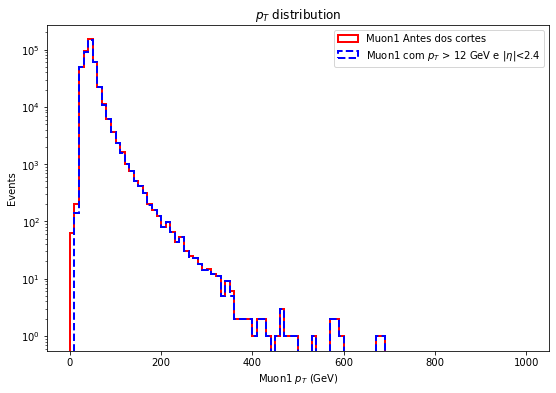

In [48]:
plt.figure(figsize=(9,6))
plt.hist(muon1_pt, bins=100, range=[0,1000], histtype='step',linewidth=2, color='red', label='Muon1 Antes dos cortes')
plt.hist(muon1_pt_cut, bins=100, range=[0,1000], histtype='step',linewidth=2, color='blue',linestyle='--', label='Muon1 com $p_T$ > 12 GeV e $|\eta|$<2.4')
plt.legend()
plt.title('$p_T$ distribution')
plt.xlabel(r'Muon1 $p_T$ (GeV)')
plt.ylabel('Events')
plt. yscale('log')

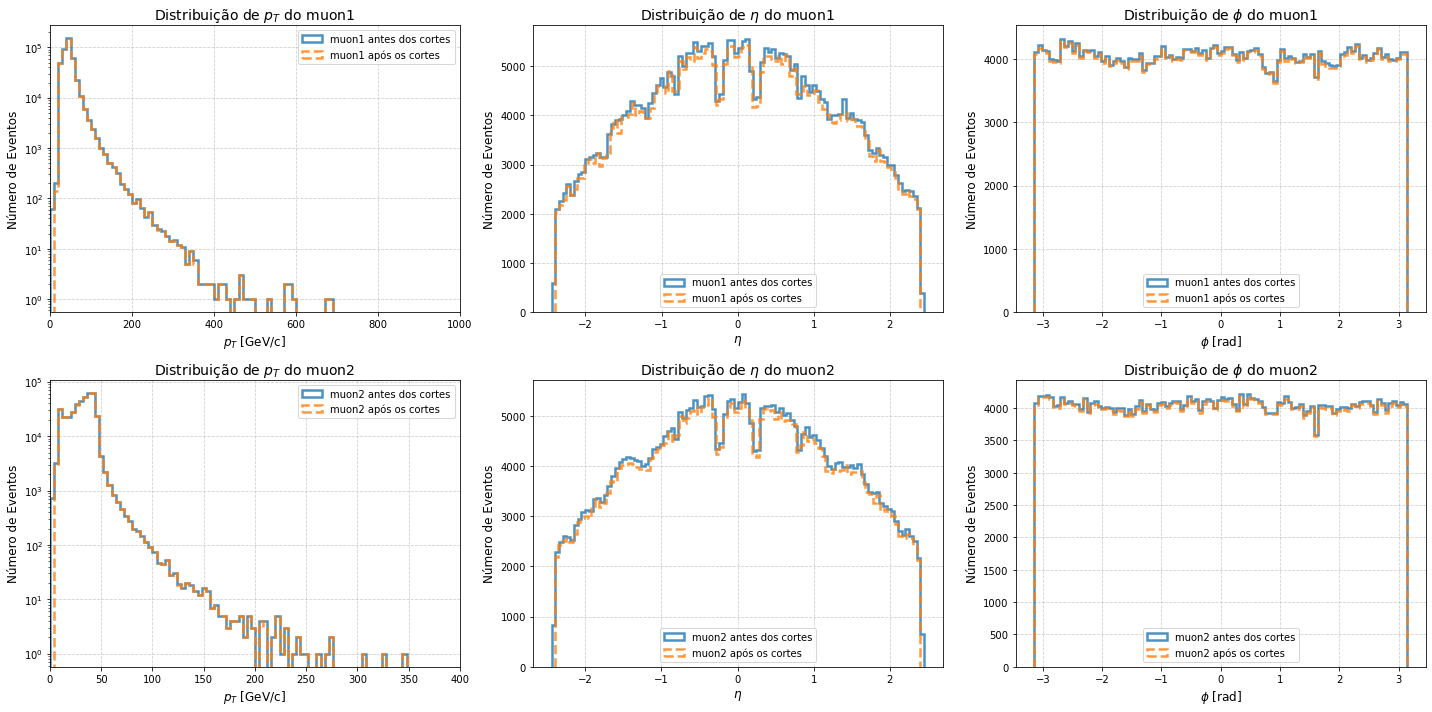

In [49]:
import matplotlib.pyplot as plt

# Criar os plots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Configuração das cores
color_before = '#1f77b4'  # Azul suave
color_after = '#ff7f0e'   # Laranja suave

# Configuração do subplot para o muon1_pt
axes[0, 0].hist(muon1_pt, bins=100, range=(0, 1000), histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 0].hist(muon1_pt_cut, bins=100, range=(0, 1000), histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 0].set_title('Distribuição de $p_T$ do muon1', fontsize=14)
axes[0, 0].set_xlabel(r'$p_T$ [GeV/c]', fontsize=12)
axes[0, 0].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(0, 1000.0)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon1_eta
axes[0, 1].hist(muon1_eta, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 1].hist(muon1_eta_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 1].set_title('Distribuição de $\eta$ do muon1', fontsize=14)
axes[0, 1].set_xlabel(r'$\eta$', fontsize=12)
axes[0, 1].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon1_phi
axes[0, 2].hist(muon1_phi, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon1 antes dos cortes', alpha=0.8)
axes[0, 2].hist(muon1_phi_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon1 após os cortes', alpha=0.8)
axes[0, 2].set_title('Distribuição de $\phi$ do muon1', fontsize=14)
axes[0, 2].set_xlabel(r'$\phi$ [rad]', fontsize=12)
axes[0, 2].set_ylabel('Número de Eventos', fontsize=12)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_pt
axes[1, 0].hist(muon2_pt, bins=100, range=(0, 400), histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 0].hist(muon2_pt_cut, bins=100, range=(0, 400), histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 0].set_title('Distribuição de $p_T$ do muon2', fontsize=14)
axes[1, 0].set_xlabel(r'$p_T$ [GeV/c]', fontsize=12)
axes[1, 0].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlim(0.0, 400.0)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_eta
axes[1, 1].hist(muon2_eta, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 1].hist(muon2_eta_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 1].set_title('Distribuição de $\eta$ do muon2', fontsize=14)
axes[1, 1].set_xlabel(r'$\eta$', fontsize=12)
axes[1, 1].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

# Configuração do subplot para o muon2_phi
axes[1, 2].hist(muon2_phi, bins=100, histtype='step', linewidth=2.5, color=color_before, label='muon2 antes dos cortes', alpha=0.8)
axes[1, 2].hist(muon2_phi_cut, bins=100, histtype='step', linewidth=2.5, color=color_after, linestyle='--', label='muon2 após os cortes', alpha=0.8)
axes[1, 2].set_title('Distribuição de $\phi$ do muon2', fontsize=14)
axes[1, 2].set_xlabel(r'$\phi$ [rad]', fontsize=12)
axes[1, 2].set_ylabel('Número de Eventos', fontsize=12)
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 5. Criaremos os 4-Vetores

`vector.array`: Cria um _array_ de 4-vetores com os componentes $p_T$, $\eta$, $\phi$ e massa dos múons. Vamos criar os 4-vetores dos múons utilizando as componentes cinemáticas que você já aplicou os cortes em função de ($\pt$, $\eta$, $\phi$, massa).

*   (5.1) Criar o 4-vetor para cada múon.
*   (5.2) Somar os 4-vetores: Após selecionar os dois múons, somamos os seus 4-vetores para obter o 4-vetores do sistema.

In [50]:
# (5.1) Criar os quatro-vetores dos múons
muon1_4vecs = vector.zip({
    "pt": muon1_pt_cut,
    "eta": muon1_eta_cut,
    "phi": muon1_phi_cut,
    "mass": muon1_mass_cut
})

In [51]:
muon1_4vecs

<MomentumArray4D [{rho: 52.6, phi: -2.72, ...}, ...] type='402481 * Momentu...'>

In [52]:
muon2_4vecs = vector.zip({
    "pt": muon2_pt_cut,
    "eta": muon2_eta_cut,
    "phi": muon2_phi_cut,
    "mass": muon2_mass_cut
})

In [53]:
muon2_4vecs

<MomentumArray4D [{rho: 42.8, phi: 1.17, ...}, ...] type='402481 * Momentum...'>

In [54]:
# (5.2) Somar os 4-vetores do par de múons

dimuon = muon1_4vecs + muon2_4vecs
dimuon

<MomentumArray4D [{rho: 36.2, phi: 2.62, ...}, ...] type='402481 * Momentum...'>

In [55]:
print(dimuon.fields)

['rho', 'phi', 'eta', 'tau']


In [56]:
# Extraindo as propriedades do quadrivetor do par
pt_dimu = dimuon.pt
phi_dimu = dimuon.phi
eta_dimu = dimuon.eta
mass_dimu = dimuon.mass


In [57]:
print(len(pt_dimu))
print(ak.type(pt_dimu))
print(ak.to_list(pt_dimu[:5]))  # Ver os primeiros 5 elementos


402481
402481 * float32
[36.16989517211914, 14.304789543151855, 29.602020263671875, 13.670807838439941, 3.7420763969421387]


# 6. Criar os plots de algumas variáveis cinemáticas do par

* (6.1) Plotar $p_T$ e $\eta$ do par de múons.

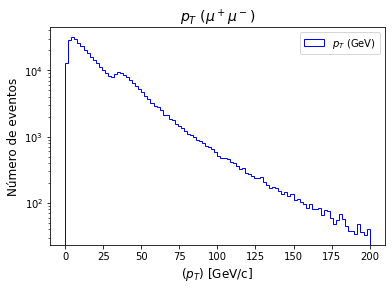

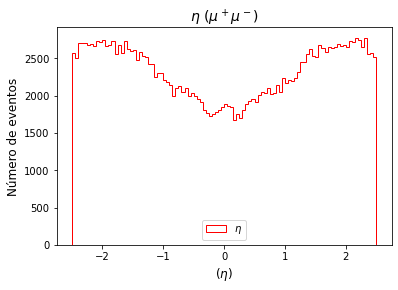

In [58]:
# (p_T) do par de múons
plt.figure()
plt.hist((pt_dimu), bins=100, range=(0, 200), histtype='step', color='blue', label=r'$p_T$ (GeV)')
plt.xlabel(r'($p_T$) [GeV/c]', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.yscale('log')
plt.title(r'$p_T$ ($\mu^+\mu^-$)', fontsize=14)
plt.legend()
plt.grid(False)
plt.show()

# (eta) do par de múons
plt.figure()
plt.hist(eta_dimu, bins=100, range=(-2.5, 2.5), histtype='step', color='red', label=r'$\eta$')
plt.xlabel(r'($\eta$)', fontsize=12)
plt.ylabel('Número de eventos', fontsize=12)
plt.title(r'$\eta$ ($\mu^+\mu^-$)', fontsize=14)
plt.legend()
plt.grid(False)
plt.show()

* (7) Calcular a massa invariante do par de múons.



In [59]:
'''
# Plotar o histograma da massa invariante
plt.figure(figsize=(10, 6))
plt.hist(mass_dimu, bins=2000, range=(0.25, 300), histtype='step', color='blue', linewidth=1.5)
plt.title("Massa Invariante do par de Múons")
plt.xlabel(r"Invariant Mass (GeV/$c^2$)")
plt.ylabel("Number of Events")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
# Adicionando legendas no gráfico
#plt.text(0.55, 3.0e3, r'$\eta$', fontsize=12, color='black')
plt.text(0.66, 2.0e3, r'$\rho,\ \omega$', fontsize=12, color='black')
plt.text(1.10, 2.0e3, r'$\phi$', fontsize=12, color='black')
plt.text(3.00, 6.0e3, r'$J/\psi$', fontsize=12, color='black')
plt.text(4.40, 2.0e3, r"$\psi'$", fontsize=12, color='black')
plt.text(10.0, 2.0e3, r'$Y(1,2,3S)$', fontsize=12, color='black')
plt.text(100.0, 1.5e3, r'$Z$', fontsize=12, color='black')
plt.show()
'''

'\n# Plotar o histograma da massa invariante\nplt.figure(figsize=(10, 6))\nplt.hist(mass_dimu, bins=2000, range=(0.25, 300), histtype=\'step\', color=\'blue\', linewidth=1.5)\nplt.title("Massa Invariante do par de Múons")\nplt.xlabel(r"Invariant Mass (GeV/$c^2$)")\nplt.ylabel("Number of Events")\nplt.xscale(\'log\')\nplt.yscale(\'log\')\nplt.grid(True)\n# Adicionando legendas no gráfico\n#plt.text(0.55, 3.0e3, r\'$\\eta$\', fontsize=12, color=\'black\')\nplt.text(0.66, 2.0e3, r\'$\rho,\\ \\omega$\', fontsize=12, color=\'black\')\nplt.text(1.10, 2.0e3, r\'$\\phi$\', fontsize=12, color=\'black\')\nplt.text(3.00, 6.0e3, r\'$J/\\psi$\', fontsize=12, color=\'black\')\nplt.text(4.40, 2.0e3, r"$\\psi\'$", fontsize=12, color=\'black\')\nplt.text(10.0, 2.0e3, r\'$Y(1,2,3S)$\', fontsize=12, color=\'black\')\nplt.text(100.0, 1.5e3, r\'$Z$\', fontsize=12, color=\'black\')\nplt.show()\n'

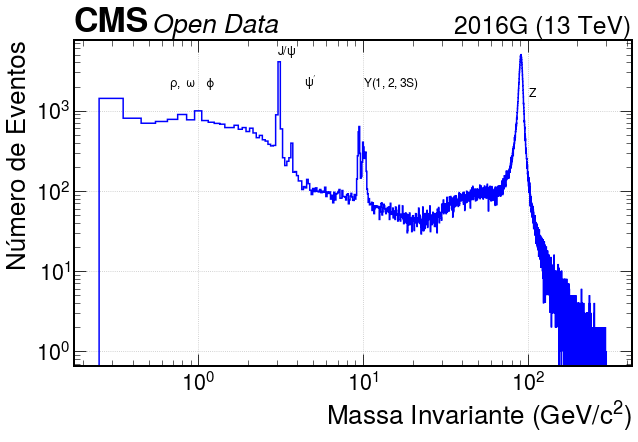

In [60]:
# Ajustar o estilo para o CMS
plt.figure(figsize=(10, 6))
hep.style.use('CMS')

# Plotar o histograma da massa invariante
plt.hist(mass_dimu, bins=3000, range=(0.25, 300), histtype='step', color='blue', linewidth=1.5)
hep.cms.label(data=True, label='Open Data', year="2016G", com=13)

# Configurações do gráfico
#plt.title("Massa Invariante do par de Múons")
plt.xlabel(r"Massa Invariante (GeV/$c^2$)")
plt.ylabel("Número de Eventos")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)

# Adicionando legendas no gráfico
plt.text(0.66, 2.0e3, r'$\rho,\ \omega$', fontsize=12, color='black')
plt.text(1.10, 2.0e3, r'$\phi$', fontsize=12, color='black')
plt.text(3.00, 5.0e3, r'$J/\psi$', fontsize=12, color='black')
plt.text(4.40, 2.0e3, r"$\psi'$", fontsize=12, color='black')
plt.text(10.0, 2.0e3, r'$Y(1,2,3S)$', fontsize=12, color='black')
plt.text(100.0, 1.5e3, r'$Z$', fontsize=12, color='black')

# Mostrar o gráfico
plt.show()

# Criar um dicionário com os dados desejados e, em seguida, um DataFrame a partir desse dicionário






* (8) Criar um dataframe e salvar as informações desejadas.

In [61]:
# Criação do dicionário muon_data
muon_data = {
    'num_final_events': num_events_after_cuts,
    'muon1_pt': ((muon1_pt_cut)),
    'muon1_eta': ((muon1_eta_cut)),
    'muon1_phi': ((muon1_phi_cut)),
    'muon2_pt': ((muon2_pt_cut)),
    'muon2_eta': ((muon2_eta_cut)),
    'muon2_phi': ((muon2_phi_cut)),
    'pt_dimu': ((pt_dimu)),
    'eta_dimu': ((eta_dimu)),
    'mass_dimu': ((mass_dimu))

}
# Criar um DataFrame com o dicionário
muon_df = pd.DataFrame(muon_data)

# Visualizar as primeiras linhas do DataFrame
print(muon_df.head())

# Salvar o DataFrame em um arquivo CSV (opcional)
muon_df.to_csv('muon_data.csv', index=False)

   num_final_events   muon1_pt  muon1_eta  muon1_phi   muon2_pt  muon2_eta  \
0            402481  52.556774  -1.429199  -2.723145  42.794273  -1.901611   
1            402481  50.203129  -0.656128   1.626221  38.603405  -1.013428   
2            402481  53.714878   0.159729  -1.947510  24.182121  -1.295410   
3            402481  48.502796  -1.802002   1.400146  35.413570  -0.882812   
4            402481  43.287487  -0.061668   1.378662  39.567261   0.787109   

   muon2_phi    pt_dimu  eta_dimu  mass_dimu  
0   1.170410  36.169895 -2.605599  91.076698  
1  -1.705811  14.304790 -2.441075  89.062195  
2   1.250244  29.602020 -0.942909  91.994675  
3  -1.836670  13.670808 -3.263888  91.714165  
4  -1.753174   3.742076  2.836089  90.336868  


In [62]:
# Usando pandas Styler para melhorar a visualização
#styled_df = muon_df.style.background_gradient(cmap='viridis').set_caption("Muon Subset Data")
styled_df = muon_df.head().style.background_gradient(cmap='plasma').set_caption("Muon Subset Data (Primeiras 5 Linhas)")
# Para visualizar no Jupyter ou Colab, apenas exiba:
styled_df

,num_final_events,muon1_pt,muon1_eta,muon1_phi,muon2_pt,muon2_eta,muon2_phi,pt_dimu,eta_dimu,mass_dimu
0,402481,52.556774,-1.429199,-2.723145,42.794273,-1.901611,1.170410,36.169895,-2.605599,91.076698
1,402481,50.203129,-0.656128,1.626221,38.603405,-1.013428,-1.705811,14.304790,-2.441075,89.062195
2,402481,53.714878,0.159729,-1.947510,24.182121,-1.295410,1.250244,29.602020,-0.942909,91.994675
3,402481,48.502796,-1.802002,1.400146,35.413570,-0.882812,-1.836670,13.670808,-3.263888,91.714165
4,402481,43.287487,-0.061668,1.378662,39.567261,0.787109,-1.753174,3.742076,2.836089,90.336868


Salvar as informações como uma Tree no arquivo ROOT

In [63]:
# Criação do dicionário muon_data
muon_data = {
    'num_final_events': np.array([num_events_after_cuts] * len(muon1_pt_cut), dtype=np.int32),
    'muon1_pt': np.array(muon1_pt_cut, dtype=np.float32),
    'muon1_eta': np.array(muon1_eta_cut, dtype=np.float32),
    'muon1_phi': np.array(muon1_phi_cut, dtype=np.float32),
    'muon2_pt': np.array(muon2_pt_cut, dtype=np.float32),
    'muon2_eta': np.array(muon2_eta_cut, dtype=np.float32),
    'muon2_phi': np.array(muon2_phi_cut, dtype=np.float32),
    'pt_dimu': np.array(pt_dimu, dtype=np.float32),
    'eta_dimu': np.array(eta_dimu, dtype=np.float32),
    'mass_dimu': np.array(mass_dimu, dtype=np.float32)
}

# Criar um DataFrame (opcional para visualização)
muon_df = pd.DataFrame(muon_data)
print(muon_df.head())  # Visualizar as primeiras linhas do DataFrame

# Salvar o dicionário como uma tree no arquivo ROOT
with uproot.recreate("muon_data_tree.root") as file:
    file["tree"] = muon_data  # Salva o dicionário como uma tree

print("Arquivo ROOT salvo com sucesso!")

   num_final_events   muon1_pt  muon1_eta  muon1_phi   muon2_pt  muon2_eta  \
0            402481  52.556774  -1.429199  -2.723145  42.794273  -1.901611   
1            402481  50.203129  -0.656128   1.626221  38.603405  -1.013428   
2            402481  53.714878   0.159729  -1.947510  24.182121  -1.295410   
3            402481  48.502796  -1.802002   1.400146  35.413570  -0.882812   
4            402481  43.287487  -0.061668   1.378662  39.567261   0.787109   

   muon2_phi    pt_dimu  eta_dimu  mass_dimu  
0   1.170410  36.169895 -2.605599  91.076698  
1  -1.705811  14.304790 -2.441075  89.062195  
2   1.250244  29.602020 -0.942909  91.994675  
3  -1.836670  13.670808 -3.263888  91.714165  
4  -1.753174   3.742076  2.836089  90.336868  
Arquivo ROOT salvo com sucesso!
